# Desafio Crédito - Pic Pay

Desafio realizado no processo de contratamento do Pic Pay, para esse desafio foi recebido um arquivo '.csv' a ser analisado. Os dados contidos se tratam de transações, o desafio é pegar essas transações e conseguir classificar entre Fraudulentos ou Não Fraudulentos.

#### Imports necessários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

%matplotlib inline

## Exploração de dados

Ao receber o dataset é recomendado passar pela fase de exploração para que se tenha um conhecimento dos dados com que estamos lidando.

In [2]:
df = pd.read_csv('desafio_fraude.csv')

df.head(10)

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
0,-44299.0,-1.239996,0.985194,-1.005080,0.251323,0.872854,-1.677811,1.451311,-0.478908,-0.009459,...,0.387768,0.286200,0.128686,1.280392,-0.301116,-0.673309,-0.069611,-0.009597,-28.38,0
1,-44300.0,-0.472690,1.869177,-0.277741,1.122846,1.526166,0.262325,0.242333,-0.006108,-1.659659,...,-0.387745,-0.434629,0.512801,-0.110994,-0.350975,-0.073826,0.035071,-0.080140,-407.00,0
2,-44301.0,0.277314,3.455314,-0.722444,-0.428284,2.512025,-0.540760,0.345111,-0.013655,-0.233508,...,-0.630255,-0.388096,0.697177,-0.523084,-0.069830,0.196482,0.052145,-0.166683,-800.00,0
3,-44301.0,-1.061770,-0.105481,-0.226711,-0.929524,-0.100625,-0.300173,0.029912,-0.205934,0.233190,...,-0.147422,-0.426827,0.070413,0.283090,-0.487739,0.288220,-0.035644,-0.007305,-31.28,0
4,-44302.0,4.622715,2.621667,0.872085,0.374010,1.456021,-1.531875,-0.162837,-1.331547,-0.340639,...,0.221196,0.804017,1.309062,1.505088,0.260178,-0.861611,-0.130562,1.023781,-522.16,0
5,-44302.0,-1.226897,-0.057421,-0.645474,-1.209587,0.508127,0.231503,0.256178,-0.073481,-0.805029,...,0.392138,1.018474,-0.068629,0.190145,-0.393703,0.603708,-0.039229,-0.023810,-2.27,0
6,-44302.0,-1.187076,-0.283468,-0.160228,-0.871200,-0.157315,-0.019609,-0.042348,-0.061183,0.292538,...,-0.086133,-0.313357,0.122671,0.289686,-0.637261,0.296274,-0.028010,-0.003439,-1.50,0
7,-44302.0,3.532498,4.777980,-0.899279,0.341794,-2.695645,0.814919,1.299022,-0.491621,1.140031,...,-0.236773,0.487309,-1.403715,1.384792,0.056282,-0.339581,0.121420,-0.227391,-384.99,0
8,-44302.0,-1.273200,0.430986,-0.374847,1.429721,0.803957,0.597754,0.377943,-0.021881,-1.524914,...,0.325682,0.717795,-0.046891,-0.024916,-0.360409,0.281505,-0.020939,-0.005926,-1.14,0
9,-44303.0,0.862315,0.424651,-1.512077,1.592340,1.109404,0.505721,-0.830403,0.055472,1.661282,...,-0.017046,-0.066471,-0.271259,-0.552943,0.043028,-0.971808,0.063580,-0.098239,-203.42,0


In [3]:
df = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149504 entries, 0 to 149999
Data columns (total 31 columns):
Ocorrencia    149504 non-null float64
PP1           149504 non-null float64
PP2           149504 non-null float64
PP3           149504 non-null float64
PP4           149504 non-null float64
PP5           149504 non-null float64
PP6           149504 non-null float64
PP7           149504 non-null float64
PP8           149504 non-null float64
PP9           149504 non-null float64
PP10          149504 non-null float64
PP11          149504 non-null float64
PP12          149504 non-null float64
PP13          149504 non-null float64
PP14          149504 non-null float64
PP15          149504 non-null float64
PP16          149504 non-null float64
PP17          149504 non-null float64
PP18          149504 non-null float64
PP19          149504 non-null float64
PP20          149504 non-null float64
PP21          149504 non-null float64
PP22          149504 non-null float64
PP23          1

In [5]:
df.describe()

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
count,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,...,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000,149504.000000
mean,-84556.497351,0.052341,0.003265,-0.194996,-0.034791,0.059155,-0.024884,0.024344,-0.004089,0.029855,...,0.010331,0.027497,0.007114,-0.002983,-0.035162,-0.001253,-0.002629,-0.001823,-88.651197,0.001465
std,27717.828764,1.879429,1.616875,1.391676,1.395143,1.335775,1.310610,1.176763,1.180590,1.100854,...,0.721123,0.705910,0.620601,0.606803,0.506207,0.483776,0.387943,0.304083,247.493546,0.038245
min,-133236.000000,-2.454930,-22.057729,-9.382558,-16.875344,-32.911462,-21.307738,-31.527244,-16.635979,-15.594995,...,-27.202839,-10.503090,-19.002942,-4.022866,-7.519589,-3.220178,-12.152401,-22.620072,-19656.530000,0.000000
25%,-115196.750000,-1.244085,-0.798563,-1.138473,-0.809967,-0.527211,-0.421884,-0.527070,-0.339383,-0.564181,...,-0.164951,-0.466301,-0.128292,-0.431553,-0.369398,-0.247287,-0.091120,-0.078834,-77.842500,0.000000
50%,-77505.000000,0.037911,-0.080737,-0.359338,-0.037359,0.123513,0.245964,-0.013747,-0.036629,0.096734,...,0.033799,0.014916,0.020068,-0.049389,-0.071057,0.057281,-0.004936,-0.016804,-22.070000,0.000000
75%,-61698.750000,0.947839,0.590056,0.553689,0.818074,0.750125,0.734419,0.563052,0.193177,0.679458,...,0.225344,0.541273,0.164421,0.348706,0.274359,0.331209,0.068263,0.048241,-5.410000,0.000000
max,-44299.000000,36.802320,63.344698,33.680984,5.683171,31.356750,21.929312,43.557242,73.216718,13.434066,...,34.830382,10.933144,44.807735,2.824849,10.295397,2.604551,22.565679,11.710896,-0.000000,1.000000


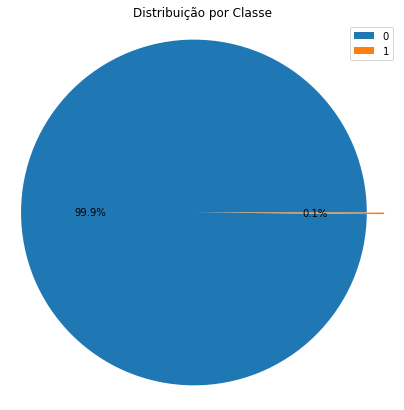

In [6]:
class_counter = df['Fraude'].value_counts(normalize=True) * 100

plt.figure(figsize=(7,7))
plt.title('Distribuição por Classe')
plt.pie(class_counter, autopct='%1.1f%%', explode=(0, 0.1))
plt.legend(class_counter.keys())
plt.axis('equal')
plt.show()

#### Primeira análise

Para essa primeira parte foram levantados alguns dados que possibilitam entender melhor alguns pontos fortes do conjunto de dados.

Ao usar o .head() já nos é dado algumas informações básicas sobre o conjunto. Sabendo que a coluna 'Fraude' é o rótulo, então podemos ver que temos 30 características (ou 30 colunas) que podem servir para chegar nesse rótulo.

Quando utilizamos a função .info() conseguimos ver que não existem dados faltantes, possibilitando ver que o conjunto de dados tem um total de 150.000 linhas e todas estão contendo um dado, é possivel notar também qual a natureza dos dados que estamos trabalhando que nesse caso são valores de ponto flutuantes para nossas características e valores inteiros para o rótulo.

O uso do .describe() nos trás uma análise mais estatística do conjunto, pode-se ver que ele nos trás alguns dos principais valores para termos uma noção, como o total de linhas, média, desvio padrão, quartis, valor mínimo e valor máximo. Aqui podemos notar que do terceiro quartil até o valor máximo e do primeiro quartil até o mínimo valor em muitos dos casos dos PP# tem uma diferença de valor muito maior que a diferença dos outros quartis, podendo indicar características de *outliers* no conjunto de dados. Esses *outliers* podem estar relacionado com itens fraudulentos, mas não é algo exato.

Por último foi realizado uma pequena análise da distribuição dos dados por cada rótulo, aqui nota-se que a distribuição é demasiadamente desproporcional, sendo 99.9% rotulados como não fraudulentos (0) e 0.1% fraudulentos (1), o que indica over sampling. O gráfico escolhida aqui foi de gráfico de pizza para poder ter uma melhor visualização de proporção no conjunto de dados.

### Visualização

Quando tratamos com dados, é de boa prática realizar a criação de alguns gráficos para o auxilar no entendimento do comportamentdo dos mesmos.

Já que estamos tratando com valores numéricos, vale a pena dar uma olhada nos dados que serão inseridos no modelo de predição para ver como está a distribuição e o escalonamento deles. Entradas que não estiverem em um padrão ou normalização adequados podem não divergir a um resultado agradável.

Para continuação do projeto a coluna 'Ocorrencia' e a 'Fraude' vão ser descartadas. A primeira pois é incremental, saindo do padrão encontrado em outras características, a segunda por ser os rótulos.

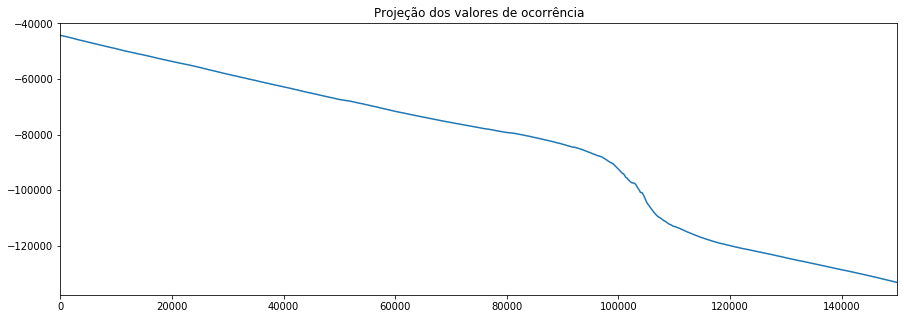

In [7]:
plt.figure(figsize=(15,5))
plt.title('Projeção dos valores de ocorrência')
df['Ocorrencia'].plot.line()
plt.show()

In [8]:
# X - características | y - rótulos

X = df.drop(['Fraude', 'Ocorrencia'], axis=1)
y = df['Fraude'].values

					Distribuição das Características


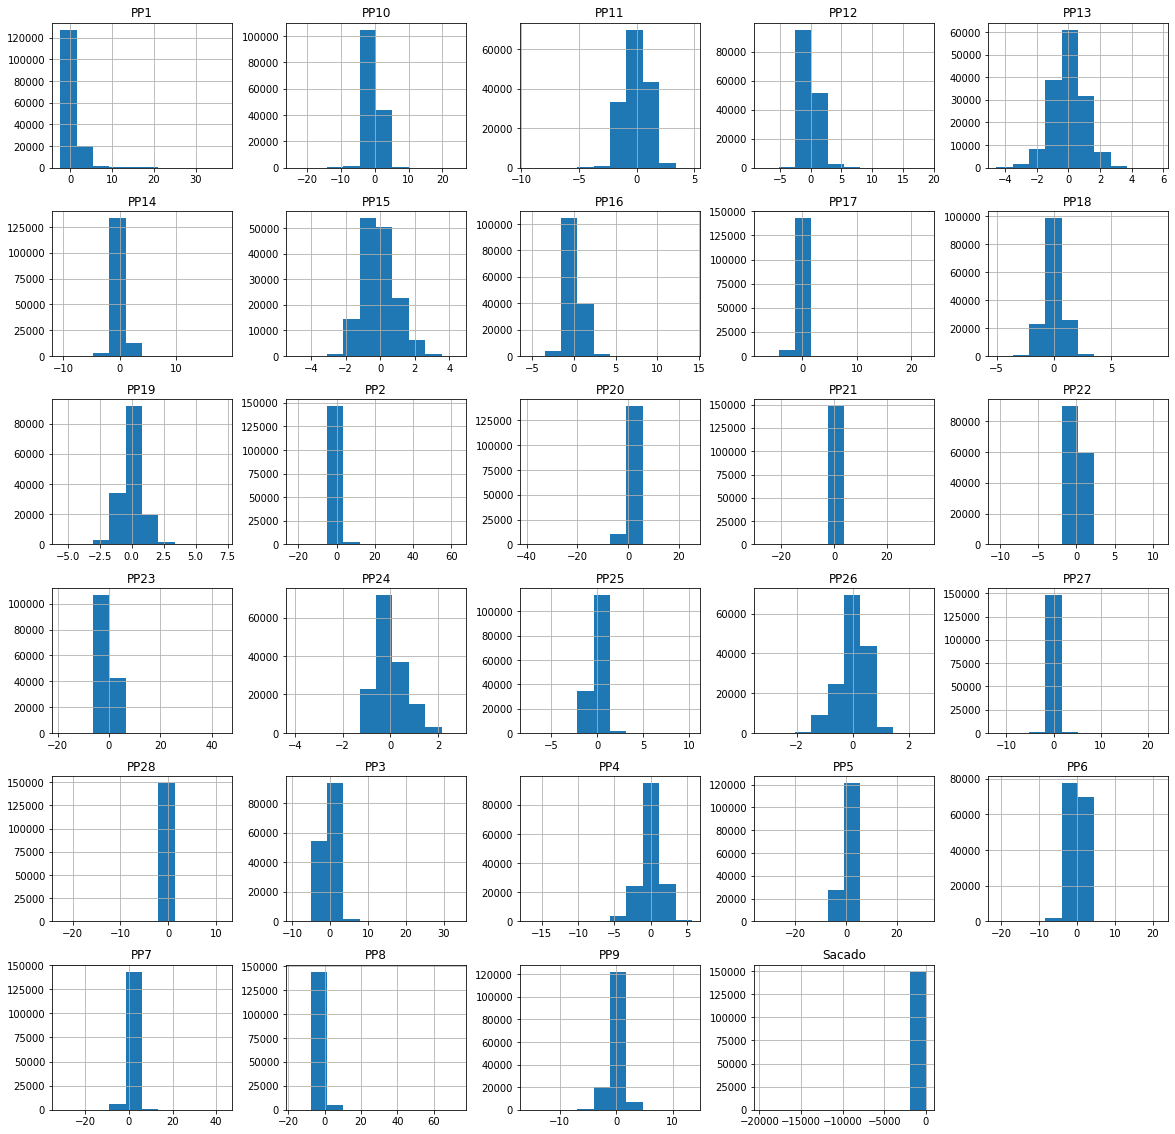

In [9]:
print('\t\t\t\t\tDistribuição das Características')
X.hist(figsize=(20, 20))
plt.show()

#### Escalonamento

Ao analisar o conjunto de dados com o histograma e com ajuda do .describe(), é notado que pode-se realizar um escalonamento para termos melhor resultado no classificador.

Para isso, é utilizado o StandardScaler() do Sklearn que realiza a aproximação da média à 0 e o desvio padrão para 1 para cada coluna do conjunto de dados.

In [10]:
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [11]:
df_scaled = pd.DataFrame(scaled_X, columns=X.columns)

df_scaled.describe()

,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,...,PP20,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado
count,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,...,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05,1.495040e+05
mean,1.596896e-17,9.315227e-18,-3.345878e-17,-1.368768e-17,-2.433366e-17,-5.322987e-18,1.977109e-17,-5.703200e-18,-8.269641e-18,-1.368768e-17,...,1.520853e-18,-1.901067e-18,-1.368768e-17,3.421920e-18,1.901067e-17,2.737536e-17,4.372454e-18,-3.326867e-19,3.136760e-18,2.499903e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.334064e+00,-1.364426e+01,-6.601820e+00,-1.207088e+01,-2.468285e+01,-1.623894e+01,-2.681227e+01,-1.408783e+01,-1.419344e+01,-2.248984e+01,...,-5.186521e+01,-3.773735e+01,-1.491779e+01,-3.063181e+01,-6.624710e+00,-1.478537e+01,-6.653779e+00,-3.131851e+01,-7.438206e+01,-7.906446e+01
25%,-6.898001e-01,-4.959137e-01,-6.779455e-01,-5.556259e-01,-4.389723e-01,-3.029135e-01,-4.685868e-01,-2.840071e-01,-5.396157e-01,-4.250125e-01,...,-1.736024e-01,-2.430677e-01,-6.995211e-01,-2.181858e-01,-7.062773e-01,-6.602791e-01,-5.085712e-01,-2.281023e-01,-2.532591e-01,4.367279e-02
50%,-7.677834e-03,-5.195340e-02,-1.180897e-01,-1.840206e-03,4.817985e-02,2.066586e-01,-3.236976e-02,-2.756322e-02,6.075180e-02,9.433087e-02,...,8.184682e-02,3.254490e-02,-1.782208e-02,2.087263e-02,-7.647658e-02,-7.091129e-02,1.209957e-01,-5.945502e-03,-4.926777e-02,2.690229e-01
75%,4.764751e-01,3.629175e-01,5.379752e-01,6.113120e-01,5.172816e-01,5.793532e-01,4.577899e-01,1.670915e-01,5.900916e-01,4.912504e-01,...,2.817560e-01,2.981664e-01,7.278231e-01,2.534756e-01,5.795780e-01,6.114523e-01,6.872254e-01,1.827401e-01,1.646385e-01,3.363380e-01
max,1.955386e+01,3.917534e+01,2.434194e+01,4.098490e+00,2.343038e+01,1.675118e+01,3.699389e+01,6.202073e+01,1.217624e+01,2.329460e+01,...,3.320668e+01,4.828605e+01,1.544911e+01,7.218937e+01,4.660225e+00,2.040786e+01,5.386407e+00,5.817441e+01,3.851828e+01,3.581972e-01


#### PCA

Aqui será utilizado o PCA, um algoritmo conhecido para reduzir dimensionalidade de matrizes, após a redução é esperado que sobre apenas as características mais significativas da matriz.

O que irá passar por esse algoritmo é todas as linhas e apenas as colunas que caracterizam se é ou não fraudulento. Vai ser usado nesse conjunto para conseguir aprensentar os dados em um gráfico 2D, para facilitar a visualização da distribuição no plano.

In [12]:
pca = PCA(2, random_state=50).fit_transform(scaled_X)

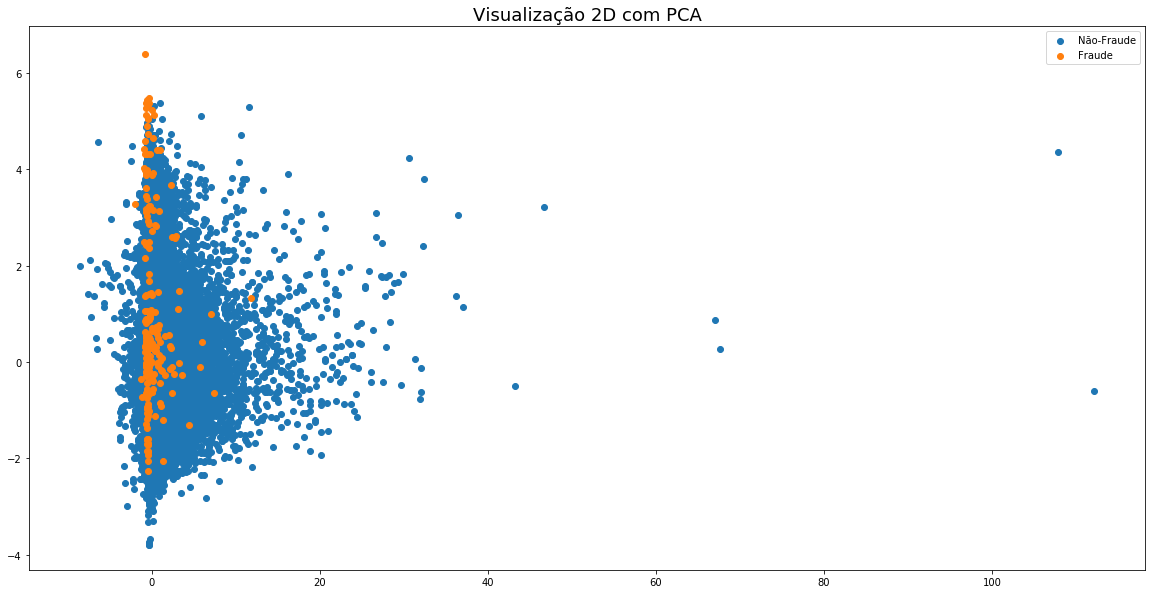

In [13]:
labels_dict = {
    0: 'Não-Fraude',
    1: 'Fraude'
}

plt.figure(figsize=(20, 10))
for label in labels_dict.keys():
    cond = label == y
    plt.scatter(pca[cond][:,0], pca[cond][:,1], label=labels_dict[label])
plt.title('Visualização 2D com PCA', fontsize=18)
plt.legend()
plt.show()

## Aumento de dados de Fraude

Como foi notado nas análises do conjunto de dados, foi possível perceber que dados fraudulentos aparecem em pequena proporção no conjunto de dados, o que já é de se esperar.

Para resolver esse problema é necessário realizar um balanceamento, caso não ocorra isso, no momento em que começarmos a treinar um modelo com esses dados ele corre risco de apenas aprender os padrões da classe com maior proporção, ou seja, vai ficar enviesado.

Para isso existem algumas técnicas, conhecidas como Oversampling, que gostaria de apresentar aqui, são elas:

* Random Oversampling
* Smote
* Adasyn

#### Random Oversampling

É o algoritmo mais simples dos três, a única coisa que ele faz é pegar os dados que já existem e duplicar os que estão em minoria para ficarem na mesma proporção dos dados em maioria.

In [14]:
X_rand_os, y_rand_os = RandomOverSampler().fit_resample(scaled_X, y)

In [15]:
np.unique(y_rand_os, return_counts=True)

(array([0, 1]), array([149285, 149285]))

Aqui é notado que o balanceamento das classes, as duas agora tem 149.285 exemplos. 

Porém não foi gerado nenhum dado novo, apenas duplicaram os antigos, por essa questão não é bom utilizar em um algoritmo de aprendizagem de máquina, podendo levar o mesmo ao overfiting, não conseguindo pegar um padrão da classe que antes estava em minoria.

<small> Esse modelo não será utilizado para comparação de modelo </small>

#### SMOTE

Esse algoritmo consegue realizar o balanceamento de forma mais inteligente, ele se utiliza de um algoritmo de aprendizagem supervisionada conhecido por K-NN para criar novas amostras. A ideia é bastante simples, ele busca um dado e então vê os K dados mais próximos e então gera novos dados entre a distância deles.

Por se tratar de novos dados não teremos mais o problema que nem do Random Oversampling e já conseguimos passar ele para um modelo para treino, sem medo do modelo falhar.

In [17]:
X_smote, y_smote = SMOTE().fit_resample(scaled_X, y)

In [18]:
np.unique(y_smote, return_counts=True)

(array([0, 1]), array([149285, 149285]))

#### ADASYN

É uma versão melhorada do SMOTE, praticamente realiza as mesmas coisas com uma nova funcionalidade, agora após a criação dos dados é adicionado um valor pequeno para que eles tenham uma variância, diminuindo a correlação linear entre os pontos. 

In [19]:
X_adasyn, y_adasyn = ADASYN().fit_resample(scaled_X, y)

In [28]:
np.unique(y_adasyn, return_counts=True)

(array([0, 1]), array([149285, 149283]))

## Geração de Modelo Preditivo

Essa é a etapa com a qual tanto desejamos, criação de modelo pra realizar predições.

Para esse modelo foi escolhido o Support Vector Machine por ser um dos algoritmos que já foi considerado o *State Of Art* antes das redes neurais e que até hoje consegue sobrepor algumas redes neurais em algumas práticas de classificação, o kernel do svm para o desenvolvimento do algoritmo foi o linear.

Serão usados dois conjuntos de dados o do smote e o do adasyn para poder gerar os modelos e realizar uma comparação, foi deixado o Random Oversampling de lado pela simplicidade que ele gera novos dados.

In [21]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3)
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_adasyn, y_adasyn, test_size=0.3)

In [22]:
clf_smote = SVC().fit(X_train_smote, y_train_smote)

In [23]:
y_pred_smote = clf_smote.predict(X_test_smote)

In [24]:
print('\t\tRelatório SVM - SMOTE\n')
print(classification_report(y_pred_smote, y_test_smote))

		Relatório SVM - SMOTE

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     44508
           1       0.98      0.98      0.98     45063

    accuracy                           0.98     89571
   macro avg       0.98      0.98      0.98     89571
weighted avg       0.98      0.98      0.98     89571



In [25]:
clf_ada = SVC().fit(X_train_ada, y_train_ada)

In [26]:
y_pred_ada = clf_ada.predict(X_test_ada)

In [27]:
print('\t\tRelatório SVM - ADASYN\n')
print(classification_report(y_pred_ada, y_test_ada))

		Relatório SVM - ADASYN

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     43987
           1       1.00      0.99      0.99     45584

    accuracy                           0.99     89571
   macro avg       0.99      0.99      0.99     89571
weighted avg       0.99      0.99      0.99     89571



## Conclusão

Ao realizar uma análise de fraude, tem-se que ter em mente que a métrica que deve ser maior é nosso f1 escore, ou média hamônica entre revocação e precisão. Não queremos que fraudes passem como não sendo fraude e o mesmo vale para quando algo que não é fraude passe como sendo fraude, os dois poderiam acarretar um problema para a empresa.

No final do treinamento foi notado que o modelo treinado com SMOTE teve um f1 escore de 98% o que já pode ser algo bom e o modelo com ADASYN conseguiu alcançar os 99%.